In [1]:
import bioframe as bf
import matplotlib.pyplot as plt
import cooler
import numpy as np
import regionsQC as rc

In [22]:
cool_path = '/home/users/luisfcd/data/Hi-C/GM12878/4DNFIXP4QG5B.mcool'
assembly = 'hg38'
resolution = 10000
regionsize = 1000000 #1 megabases

In [23]:
chromsizes  = bf.fetch_chromsizes(assembly)[:22] #pick first 22 chromosomes only
bins = bf.binnify(chromsizes, resolution)

In [24]:
c = cooler.Cooler(cool_path+'::resolutions/'+str(resolution))

In [25]:
c.bins()[:]

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,10000,NaN,0.000000,0.000000,NaN
1,chr1,10000,20000,NaN,0.006359,0.053519,NaN
2,chr1,20000,30000,NaN,0.000318,0.011967,NaN
3,chr1,30000,40000,NaN,0.002544,0.033849,NaN
4,chr1,40000,50000,NaN,0.001696,0.027637,NaN
...,...,...,...,...,...,...,...
308832,chrY,57180000,57190000,NaN,0.000000,0.000000,NaN
308833,chrY,57190000,57200000,NaN,0.000000,0.000000,NaN
308834,chrY,57200000,57210000,NaN,0.000000,0.000000,NaN
308835,chrY,57210000,57220000,NaN,0.000000,0.000000,NaN


In [26]:
for chrom, chromsize in zip(chromsizes.index, chromsizes):
    print(chrom, chromsize)

chr1 248956422
chr2 242193529
chr3 198295559
chr4 190214555
chr5 181538259
chr6 170805979
chr7 159345973
chr8 145138636
chr9 138394717
chr10 133797422
chr11 135086622
chr12 133275309
chr13 114364328
chr14 107043718
chr15 101991189
chr16 90338345
chr17 83257441
chr18 80373285
chr19 58617616
chr20 64444167
chr21 46709983
chr22 50818468


In [27]:
regions = rc.find_regions('chr1', 248956422, resolution, regionsize, c.bins()[:], rc.hic_criteria)

In [28]:
len(regions)

202

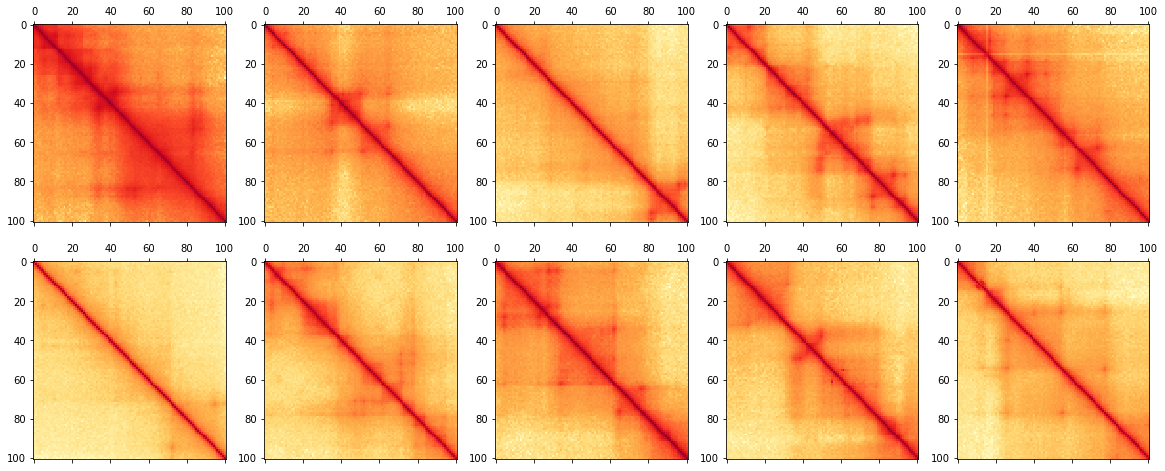

In [29]:
k = 10
figure_width = 10
fig, axs = plt.subplots(2, 5, figsize = (20, 8))
for i in range(10):
    region = regions[k+i]
    mat = c.matrix(balance=True).fetch(region)
    ax = axs[i//5, i%5]
    ax.matshow(np.log10(mat + 5e-6),cmap = 'YlOrRd', aspect='auto', interpolation ='none')

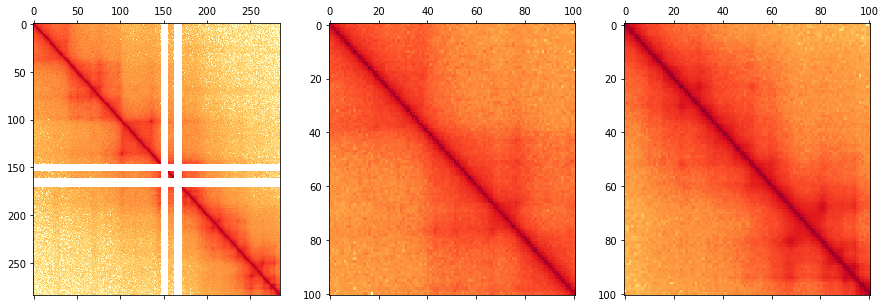

In [30]:
fig = plt.figure(figsize=(15, 5))
ax1  = plt.subplot(131)
mat = c.matrix(balance=True).fetch('chr1:106765625-109593750')
ax1.matshow(np.log10(mat + 5e-6),cmap = 'YlOrRd', aspect='auto', interpolation ='none')

ax2  = plt.subplot(132)
mat = c.matrix(balance=True).fetch('chr1:106765625-107765625')
ax2.matshow(np.log10(mat + 5e-6),cmap = 'YlOrRd', aspect='auto', interpolation ='none')

ax3  = plt.subplot(133)
mat = c.matrix(balance=True).fetch('chr1:108593750-109593750')
ax3.matshow(np.log10(mat + 5e-6),cmap = 'YlOrRd', aspect='auto', interpolation ='none')

In [31]:
all_regions = []
for chrom, chromsize in zip(chromsizes.index, chromsizes):
    regions = rc.find_regions(chrom, chromsize, resolution, regionsize, c.bins()[:], rc.hic_criteria)
    all_regions += regions

In [32]:
all_regions_str = '\n'.join(all_regions)
regions_path = '../data/'

In [33]:
with open(regions_path +'regions.tsv', 'w+') as filep:
    filep.write(all_regions_str)